# Dynamical System Analysis of Quantum Tunneling in an Asymmetric Double-Well Potential : Figure 2

**Authors:**  
Swetamber Das (ORCID: 0000-0002-2669-0842) <swetamber.p@srmap.edu.in>  
Arghya Dutta (ORCID: 0000-0003-2116-6475) <arghya.d@srmap.edu.in>  
Department of Physics, SRM University-AP, Amaravati 522240, Andhra Pradesh, India

---

**Manuscript status:** *This notebook generates Figure 2 in the manuscript “Dynamical system analysis of quantum tunneling in an asymmetric double-well potential,” currently under review.*

**About:** This notebook reproduces the fixed-point analysis and tunneling dynamics illustrated in the manuscript. Calculations use the Ehrenfest formalism; sections below compute fixed points, perform linear stability analysis, and simulate time evolution to visualize tunneling behaviour in an asymmetric double-well potential.


---


In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from sympy import symbols, Matrix, lambdify, Eq, solve, N
from IPython.display import display, Math

In [43]:
# Set Latex fonts
new_rc_params = {
    "text.usetex": True,
    "figure.dpi": 200,
    "text.latex.preamble": r"\usepackage{amsmath}",
    "font.size": "12",
    "font.family": "serif",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
}
mpl.rcParams.update(new_rc_params)

### Model equations
$$
\frac{\mathrm{d}^2 \langle x \rangle}{\mathrm{d}t^2} = -a\langle x\rangle + b [V_{\rm x}+\langle x \rangle^2 ] - c [ S+ 3  V_{\rm x}\langle x \rangle + \langle x \rangle^3] $$

$$\frac{\mathrm{d}^2 V_{\rm x}}{\mathrm{d}t^2} = 4E -2 \langle p \rangle^2 - a [2 \langle x \rangle^2 + 4 V_{\rm x}] + b \left[\frac{10S}{3}+ 8  V_{\rm x}\langle x \rangle+ \frac{4}{3} \langle x \rangle^3  \right] - c \left[9 V_{\rm x}^2 +  10S \langle x \rangle  + 12 \langle x \rangle^2 V_{\rm x} + \langle x \rangle^4 \right]
$$

### Linearization
$$
\frac{d^2}{dt^2} \delta \langle x \rangle = \left[-a + 2b \langle x \rangle - 3c \langle x \rangle^2 - 3c V_x\right] \delta \langle x \rangle + \left[b - 3c \langle x \rangle\right] \delta V_x
$$
$$
\frac{d^2}{dt^2} \delta V_x = (-4a \langle x \rangle + 4b \langle x \rangle^2 - 4c \langle x \rangle^3 + 8b V_x - 24c \langle x \rangle V_x - 10cS) \delta \langle x \rangle + (-4a + 8b \langle x \rangle - 18c V_x - 12c \langle x \rangle^2) \delta V_x
$$

### Stability matrix
$$M = \begin{pmatrix}
-a + 2b \langle x \rangle - 3c \langle x \rangle^2 - 3c V_x & b - 3c \langle x \rangle \\
-4a \langle x \rangle + 4b \langle x \rangle^2 - 4c \langle x \rangle^3 + 8b V_x - 24c \langle x \rangle V_x - 10cS & -4a + 8b \langle x \rangle - 18c V_x - 12c \langle x \rangle^2
\end{pmatrix}$$

### Solving for the eigenvalues

In [44]:
from sympy import symbols, Matrix, latex, simplify, Eq, lambdify

# Define symbolic variables
a, b, c, x_avg, V_x, S = symbols('a b c ⟨x⟩ V_x S')

# Define the matrix M (same as before)
M11 = -a + (2*b*x_avg) - (3*c*x_avg**2) - (3*c*V_x)
M12 = b - (3*c*x_avg)
M21 = (-4*a*x_avg) + (4*b*x_avg**2) - (4*c*x_avg**3) + (8*b*V_x) - (24*c*x_avg*V_x) - 10*c*S
M22 = -4*a - 18*c*V_x + (8*b*x_avg) - 12*c*x_avg**2

M = Matrix([
    [M11, M12],
    [M21, M22]
])

# Compute eigenvalues symbolically
eigenvalues = M.eigenvals()

# Convert eigenvalues to LaTeX
eigenvalues_latex = {k: latex(v) for k, v in eigenvalues.items()}

# Display in LaTeX (renders nicely in Jupyter)
for eigenvalue, multiplicity in eigenvalues.items():
    display(Math(fr"\lambda = {latex(eigenvalue)} \quad (\text{{Multiplicity}}: {multiplicity})"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Verification 1 (trace of the matrix  = sum of eigenvalues)

In [45]:
# Sum of eigenvalues (λ1 + λ2)
sum_eigenvalues = sum(eigenvalues.keys())

# Trace of M (M11 + M22)
trace_M = M.trace()

# Check if sum(λ) == trace(M) symbolically
equality_check = simplify(Eq(sum_eigenvalues, trace_M))

# Display results
display(Math(
    fr"\text{{Sum of eigenvalues: }} {latex(sum_eigenvalues)} \\ "
    fr"\text{{Trace of }} M: {latex(trace_M)} \\ "
    fr"\text{{Verification: }} \sum \lambda_i = \text{{tr}}(M) \quad \Rightarrow \quad {equality_check}"
))

<IPython.core.display.Math object>

### Verification 2 (determinant of the matrix  = product of eigenvalues)

In [46]:
det_M = M.det()

# Product of eigenvalues (λ1 * λ2)
product_eigenvalues = 1
for eigenvalue in eigenvalues.keys():
    product_eigenvalues *= eigenvalue

# Check if product(λ) == det(M) symbolically
equality_check = simplify(Eq(product_eigenvalues, det_M))

# Display results
display(Math(
    fr"\text{{Product of eigenvalues: }} {latex(product_eigenvalues)} \\ "
    fr"\text{{Determinant of }} M: {latex(det_M)} \\ "
    fr"\text{{Verification: }} \prod \lambda_i = \det(M) \quad \Rightarrow \quad {equality_check}"
))

<IPython.core.display.Math object>

## Model parameters to generate double well potential

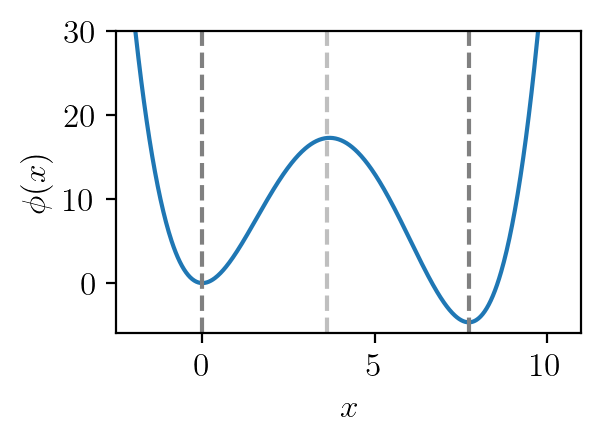

In [47]:
a = 10.0 
b =  4.0
c =  0.35
x = np.linspace(-5,15,1000)
potential = a/2*x**2 - b/3*x**3 + c/4*x**4
plt.figure(figsize=(3, 2))
plt.plot(x, potential)
plt.ylim([-6, 30])
plt.xlim([-2.5, 11])
plt.axvline(x=0.0, color="gray", linestyle="--")
plt.axvline(x=3.604127443407402, color="gray", alpha=0.5, linestyle="--")
plt.axvline(x=7.7345908033901365, color="gray", linestyle="--")
plt.xlabel(r"$x$")
plt.ylabel(r"$\phi(x)$")
plt.show()

## Fixed point : Local maxima

#### for $\langle x \rangle_f$

In [48]:
w_f = 0
p_f = 0
x_f1 = (b - np.sqrt(b**2 - 4.0*a*c))/(2.0*c) # X value of the fixed point
print("Location of the potential barrier:",x_f1)
# the other fixed point is always stable
display(Math(r'\langle x\rangle_f = ' + f'{x_f1:.4f}'))  # Display with 4 decimal places
### Height of the barrier
phi = a/2*x_f1**2 - b/3*x_f1**3 +c/4*x_f1**4
display(Math(r'\phi(x) = ' + f'{phi:.4f}'))  # Display with 4 decimal places

Location of the potential barrier: 3.693980625181293


<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### for $V_{x,f}$ (setting $\langle p\rangle = 0$)

$$-9c V_{\rm x}^2 + (-4a + 8b \langle x \rangle - 12c \langle x \rangle^2) V_{\rm x} + \left[ 4E - 2a \langle x \rangle^2 + b \frac{10S}{3} + b \frac{4}{3} \langle x \rangle^3 - 10cS \langle x \rangle - c \langle x \rangle^4 \right] = 0$$

### Recasting in the following form:

$\frac{9c}{4} V_{\rm x}^2 + \left( a - 2b \langle x \rangle + 3c \langle x \rangle^2 \right) V_{\rm x} + \left[ \frac{a \langle x \rangle^2}{2} - b \frac{5S}{6} - b \frac{\langle x \rangle^3}{3} + \frac{5cS \langle x \rangle}{2} + \frac{c \langle x \rangle^4}{4} \right] = E$

$S = -1/c(a \langle x\rangle - bV - b\langle x\rangle^2 + 3c V \langle x\rangle + c\langle x\rangle^3)$

$\frac{9c}{4}V^2 + \left[a - \frac{5b^2}{6c} + 3b\langle x\rangle - \frac{9c\langle x\rangle^2}{2}\right] V + \left[ \frac{5ab\langle x\rangle}{6c} - 2a\langle x\rangle^2 - \frac{5b^2\langle x\rangle^2}{6c} + 3b\langle x\rangle^3 - \frac{9c\langle x\rangle^4}{4} \right] = E$

This equation is quadratitic in V with the following coefficients

$l_1 = \frac{9c}{4}$,
$l_2 = \left[a - \frac{5b^2}{6c} + 3b\langle x\rangle - \frac{9c\langle x\rangle^2}{2}\right] $,
$l_3 = \left[ \frac{5ab\langle x\rangle}{6c} - 2a\langle x\rangle^2 - \frac{5b^2\langle x\rangle^2}{6c} + 3b\langle x\rangle^3 - \frac{9c\langle x\rangle^4}{4} \right]$

### Calculate the coefficients

In [49]:
l1 = 9.0*c/4
l2 = a- 5*b**2/(6*c) + 3*b*x_f1 - 9*c*x_f1**2/2
l3 = 5*b*a*x_f1/(6*c) - 2*a*x_f1**2 - 5*b**2*x_f1**2/(6*c) + 3*b*x_f1**3 - 9*c*x_f1**4/4
#print(l1, l2, l3)

### Calculating minium possible value of the variance to get a fixed point from the energy computed above

In [50]:
V_min = -l2/(2.0*l1) # setting determinant to be zero for the value of energy E_min
print(V_min)
display(Math(r'V_\text{min} = ' + f'{V_min:.6f}'))  # Display with 4 decimal places

3.3391249817941957


<IPython.core.display.Math object>

### Stability of the fixed using eigenvalues

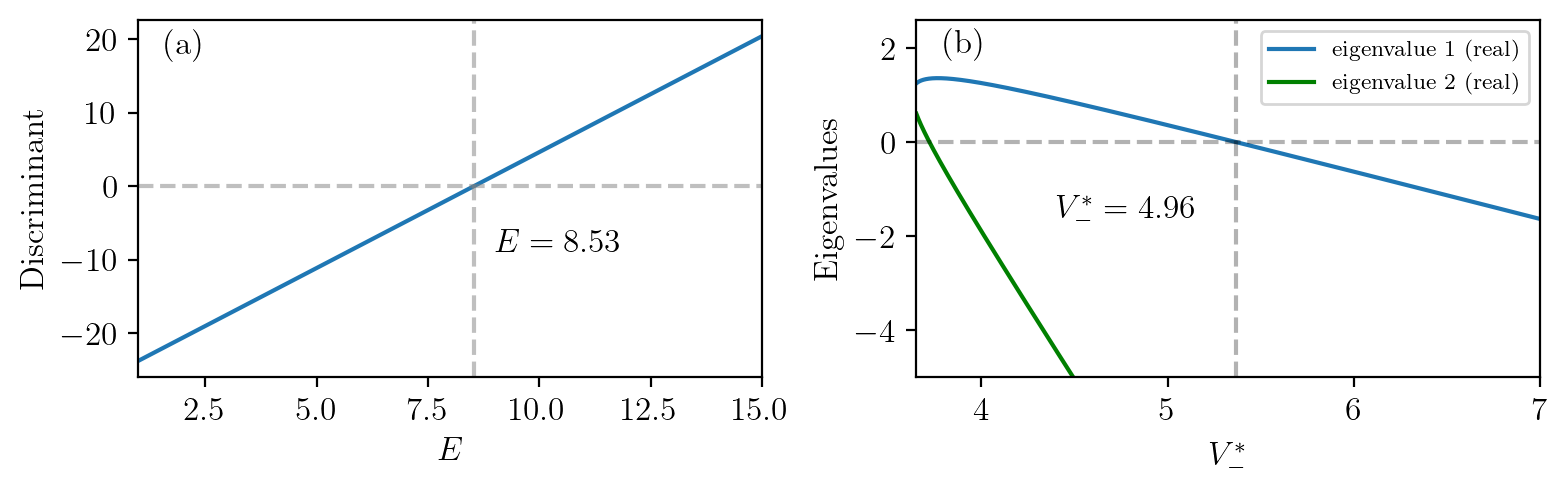

In [51]:
Energy = np.linspace(1, 15, 5000000)
Det = l2**2 - 4.0*l1*(l3 - Energy)

ind = np.where(Det > 0, Det, np.inf).argmin()
E_min = Energy[ind]

# Parameters for symbolic matrix M
a, b, c = 10, 4, 17/50
x_f1 = 3.604

V_x = symbols('V_x')
x_avg = x_f1
S = -1/c*(a*x_avg - b*V_x - b*x_avg**2 + 3*c*V_x*x_avg + c*x_avg**3)

M11 = -a + (2*b*x_avg) - (3*c*x_avg**2) - (3*c*V_x)
M12 = b - (3*c*x_avg)
M21 = (-4*a*x_avg) + (4*b*x_avg**2) - (4*c*x_avg**3) + (8*b*V_x) - (24*c*x_avg*V_x) - 10.0*c*S
M22 = -4*a - (18*c*V_x) + (8*b*x_avg) - (12*c*x_avg**2)

M = Matrix([[M11, M12], [M21, M22]])

params = {a: a, b: b, c: c, S: S, x_avg: x_avg}
M_specific = M.subs(params)
M_func = lambdify(V_x, M_specific, modules='numpy')

V_x_values = np.linspace(1, 10, 50000)
eigenvalues = []
for v in V_x_values:
    M_num = np.array(M_func(v), dtype=float)
    eigvals = np.linalg.eigvals(M_num)
    eigenvalues.append(eigvals)
eigenvalues = np.array(eigenvalues)

ind_here = np.where(eigenvalues.real[:, 0] > 0, eigenvalues.real[:, 0], np.inf).argmin()
V_val_here = V_x_values[ind_here]

# Create combined plot with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(8, 2.6))

# Plot Det vs Energy (left)
axs[0].plot(Energy, Det)
axs[0].axhline(y=0, color='grey', linestyle='--', alpha=0.5)
axs[0].text(9, -9, r"$E = 8.53$", fontsize=12)
axs[0].text(1.6, 18, r"(a)")
axs[0].axvline(x=8.53, color='grey', linestyle='--', alpha=0.5)
axs[0].set_xlabel(r"$E$", fontsize=12)
axs[0].set_ylabel("Discriminant", fontsize=12)
axs[0].set_xlim([1, 15])

# Plot eigenvalues vs V_x (right)
axs[1].plot(V_x_values, eigenvalues.real[:, 0], label=r'eigenvalue 1 (real)')
axs[1].plot(V_x_values, eigenvalues.real[:, 1], label=r'eigenvalue 2 (real)', color='g')
axs[1].axhline(y=0, color='k', linestyle='--', alpha=0.3)
axs[1].axvline(x=V_x_values[ind_here], color='k', linestyle='--', alpha=0.3)
axs[1].set_xlabel('$V^*_-$', fontsize=12)
axs[1].set_ylabel('Eigenvalues', fontsize=12)
axs[1].legend(fontsize = 8)
axs[1].text(4.4, -1.5, r"$V^*_- = 4.96$", fontsize=12)
axs[1].text(3.8, 1.9, "(b)")
axs[1].set_xlim([3.65, 7])
axs[1].set_ylim([-5, 2.6])
plt.subplots_adjust(hspace=0.75)
plt.tight_layout()
#plt.savefig("fig2.pdf", bbox_inches="tight", dpi=300, transparent=True)
plt.show()